Loading MNIST dataset...
Training data shape: (10000, 784)
Test data shape: (1000, 784)


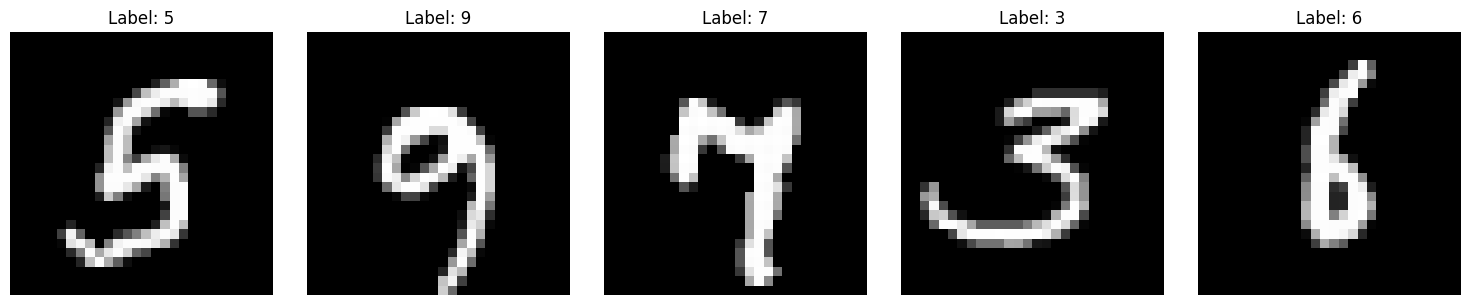


Evaluating Basic Network (1 layer, Tanh, SGD)...
Configuration: [100], tanh, sgd, xavier
Epoch 0, Training Loss: 2.315403, Training Accuracy: 0.0845, Validation Loss: 2.310226, Validation Accuracy: 0.0875
Epoch 10, Training Loss: 1.862048, Training Accuracy: 0.5729, Validation Loss: 1.851649, Validation Accuracy: 0.5875
Epoch 20, Training Loss: 1.537844, Training Accuracy: 0.7031, Validation Loss: 1.523504, Validation Accuracy: 0.7210
Epoch 30, Training Loss: 1.305905, Training Accuracy: 0.7519, Validation Loss: 1.288522, Validation Accuracy: 0.7655
Epoch 40, Training Loss: 1.138800, Training Accuracy: 0.7829, Validation Loss: 1.119486, Validation Accuracy: 0.7910
Epoch 50, Training Loss: 1.015527, Training Accuracy: 0.7983, Validation Loss: 0.995259, Validation Accuracy: 0.8090
Epoch 60, Training Loss: 0.921851, Training Accuracy: 0.8139, Validation Loss: 0.901045, Validation Accuracy: 0.8220
Epoch 70, Training Loss: 0.848645, Training Accuracy: 0.8235, Validation Loss: 0.827788, Val

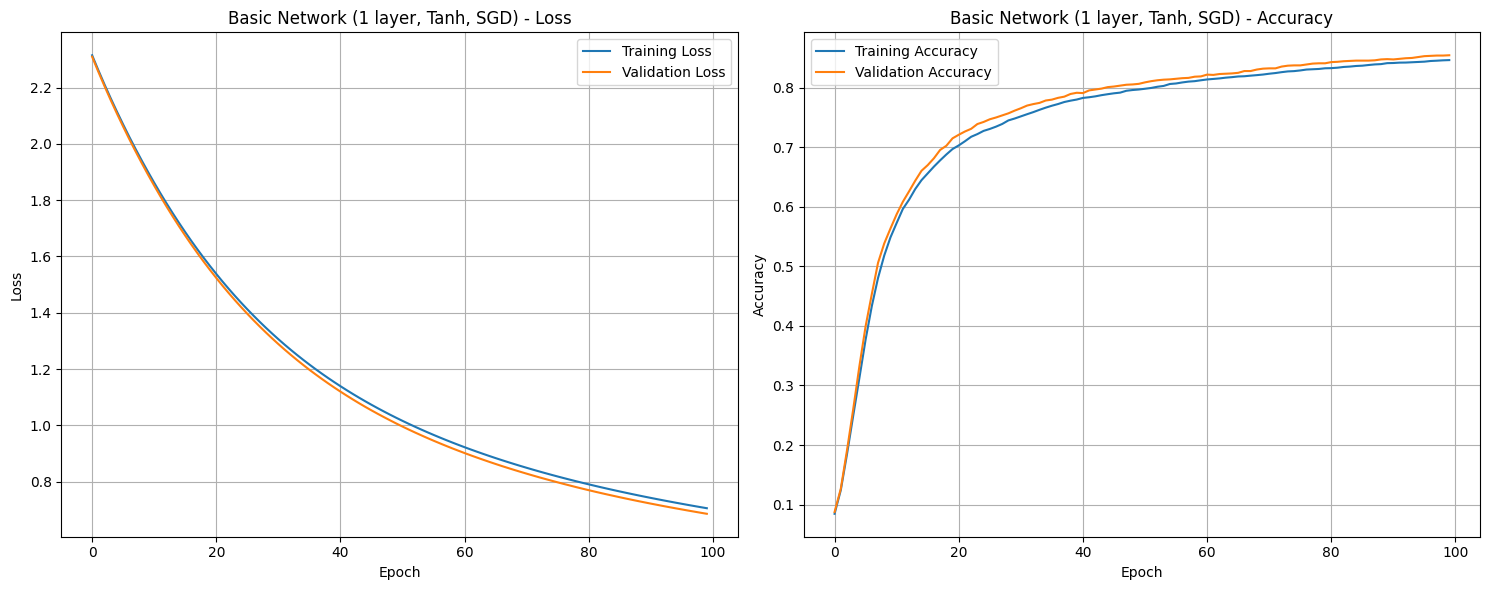


Evaluating Deep Network (2 layers, Tanh, SGD)...
Configuration: [100, 50], tanh, sgd, xavier
Epoch 0, Training Loss: 2.225554, Training Accuracy: 0.1700, Validation Loss: 2.223006, Validation Accuracy: 0.1865
Epoch 10, Training Loss: 1.806094, Training Accuracy: 0.6302, Validation Loss: 1.795672, Validation Accuracy: 0.6455
Epoch 20, Training Loss: 1.509792, Training Accuracy: 0.7035, Validation Loss: 1.494161, Validation Accuracy: 0.7260
Epoch 30, Training Loss: 1.293519, Training Accuracy: 0.7362, Validation Loss: 1.274601, Validation Accuracy: 0.7480
Epoch 40, Training Loss: 1.134328, Training Accuracy: 0.7638, Validation Loss: 1.113330, Validation Accuracy: 0.7785
Epoch 50, Training Loss: 1.014361, Training Accuracy: 0.7880, Validation Loss: 0.992009, Validation Accuracy: 0.7990
Epoch 60, Training Loss: 0.921372, Training Accuracy: 0.8093, Validation Loss: 0.898493, Validation Accuracy: 0.8185
Epoch 70, Training Loss: 0.847273, Training Accuracy: 0.8255, Validation Loss: 0.824447,

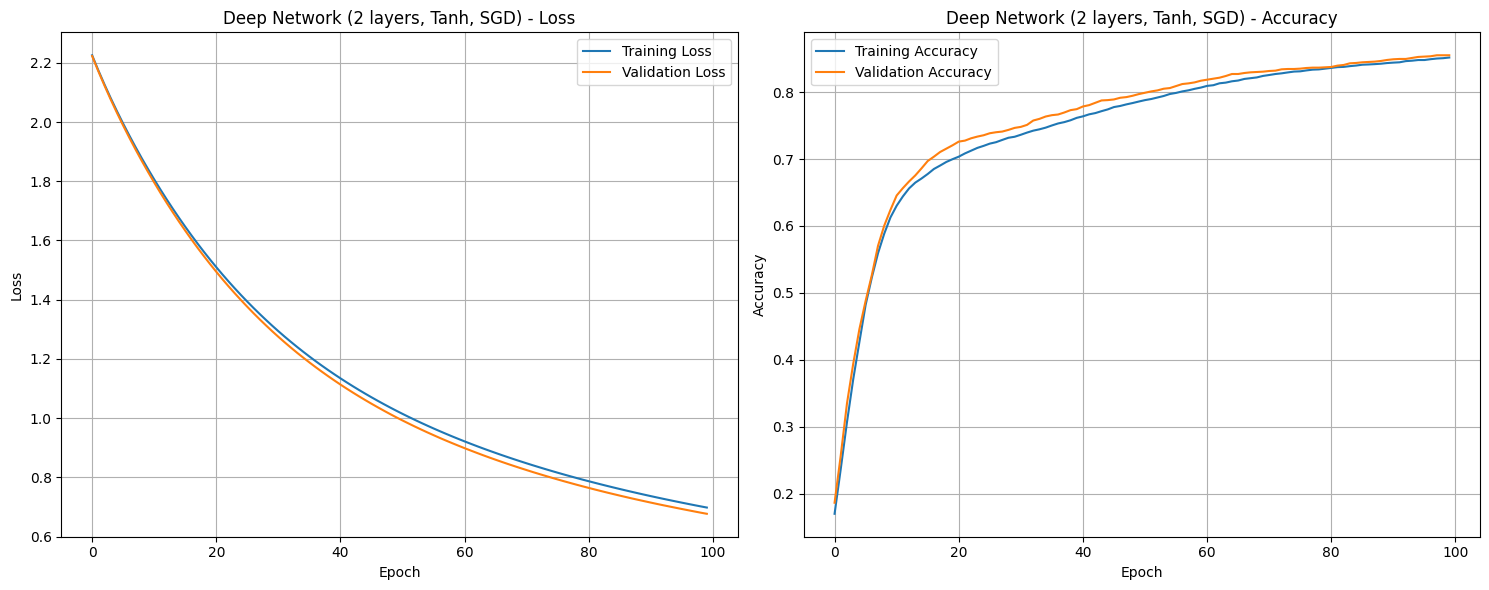


Evaluating ReLU Network (1 layer, ReLU, SGD)...
Configuration: [100], relu, sgd, he
Epoch 0, Training Loss: 2.337687, Training Accuracy: 0.1259, Validation Loss: 2.331676, Validation Accuracy: 0.1260
Epoch 10, Training Loss: 1.885465, Training Accuracy: 0.4921, Validation Loss: 1.873984, Validation Accuracy: 0.4985
Epoch 20, Training Loss: 1.528042, Training Accuracy: 0.6699, Validation Loss: 1.513830, Validation Accuracy: 0.6760
Epoch 30, Training Loss: 1.252316, Training Accuracy: 0.7408, Validation Loss: 1.235958, Validation Accuracy: 0.7515
Epoch 40, Training Loss: 1.056179, Training Accuracy: 0.7782, Validation Loss: 1.038503, Validation Accuracy: 0.7835
Epoch 50, Training Loss: 0.918689, Training Accuracy: 0.8013, Validation Loss: 0.900345, Validation Accuracy: 0.8090
Epoch 60, Training Loss: 0.819645, Training Accuracy: 0.8165, Validation Loss: 0.801117, Validation Accuracy: 0.8270
Epoch 70, Training Loss: 0.745779, Training Accuracy: 0.8299, Validation Loss: 0.727702, Validati

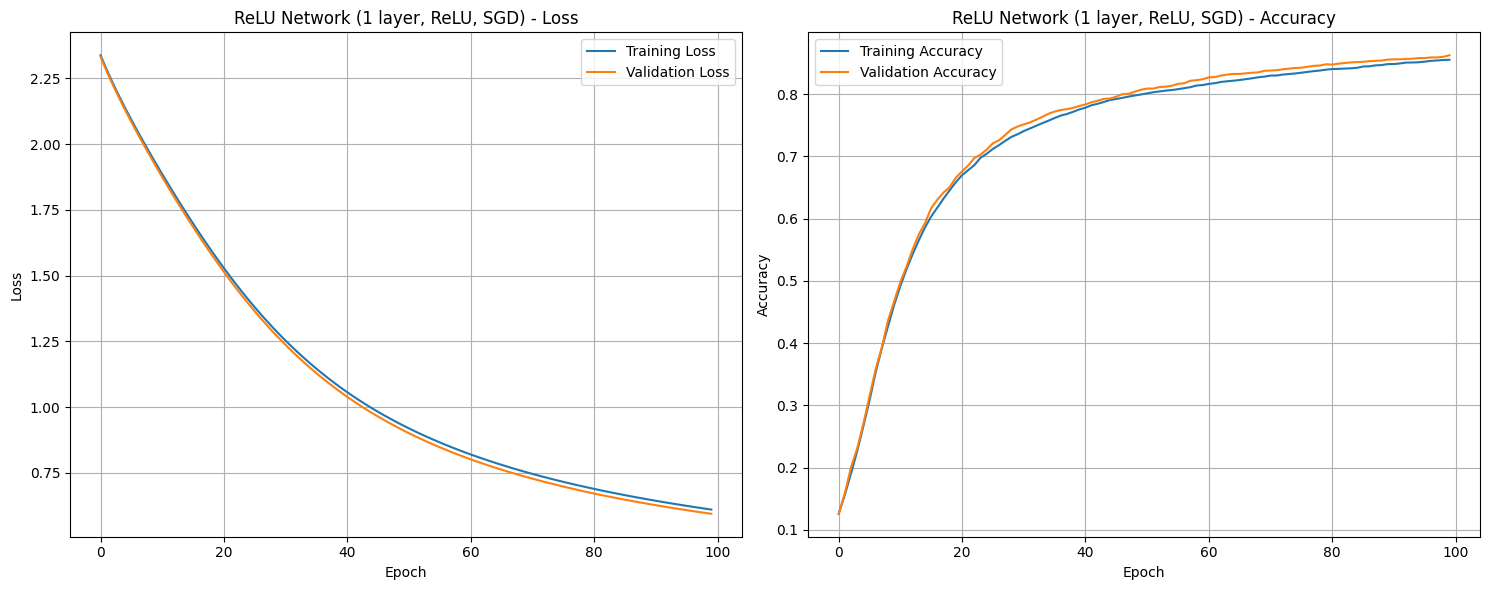


Evaluating Deep ReLU Network (2 layers, ReLU, SGD)...
Configuration: [100, 100], relu, sgd, he
Epoch 0, Training Loss: 2.360734, Training Accuracy: 0.0808, Validation Loss: 2.366815, Validation Accuracy: 0.0695
Epoch 10, Training Loss: 1.969547, Training Accuracy: 0.4534, Validation Loss: 1.975597, Validation Accuracy: 0.4575
Epoch 20, Training Loss: 1.580176, Training Accuracy: 0.6408, Validation Loss: 1.580279, Validation Accuracy: 0.6465
Epoch 30, Training Loss: 1.249433, Training Accuracy: 0.7336, Validation Loss: 1.244761, Validation Accuracy: 0.7260
Epoch 40, Training Loss: 1.002852, Training Accuracy: 0.7839, Validation Loss: 0.993907, Validation Accuracy: 0.7825
Epoch 50, Training Loss: 0.834286, Training Accuracy: 0.8104, Validation Loss: 0.823563, Validation Accuracy: 0.8110
Epoch 60, Training Loss: 0.720891, Training Accuracy: 0.8307, Validation Loss: 0.709923, Validation Accuracy: 0.8275
Epoch 70, Training Loss: 0.641637, Training Accuracy: 0.8455, Validation Loss: 0.63099

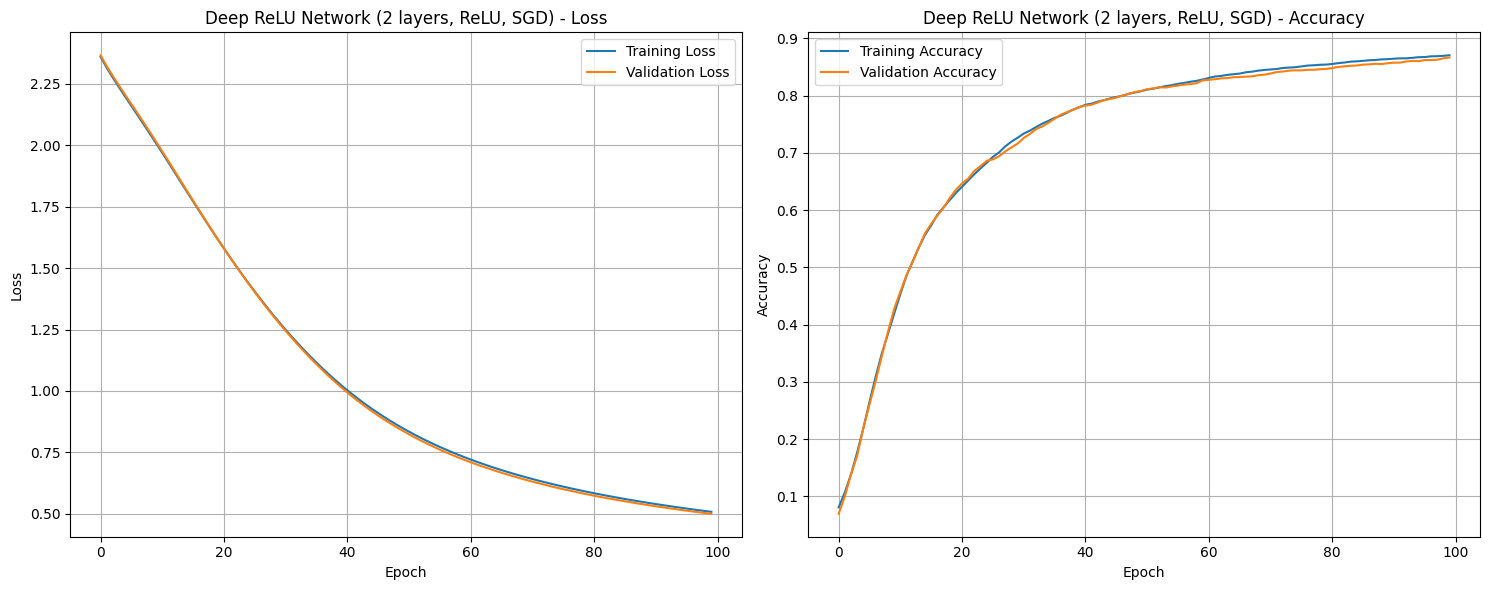


Evaluating AdaGrad Network (1 layer, ReLU, AdaGrad)...
Configuration: [100], relu, adagrad, he
Epoch 0, Training Loss: 0.392533, Training Accuracy: 0.8808, Validation Loss: 0.401174, Validation Accuracy: 0.8805
Epoch 10, Training Loss: 0.029358, Training Accuracy: 0.9952, Validation Loss: 0.184785, Validation Accuracy: 0.9545
Epoch 20, Training Loss: 0.011544, Training Accuracy: 0.9989, Validation Loss: 0.196626, Validation Accuracy: 0.9550
Epoch 30, Training Loss: 0.004563, Training Accuracy: 1.0000, Validation Loss: 0.196853, Validation Accuracy: 0.9565
Epoch 40, Training Loss: 0.003063, Training Accuracy: 1.0000, Validation Loss: 0.202439, Validation Accuracy: 0.9575
Epoch 50, Training Loss: 0.002225, Training Accuracy: 1.0000, Validation Loss: 0.208172, Validation Accuracy: 0.9565
Epoch 60, Training Loss: 0.001747, Training Accuracy: 1.0000, Validation Loss: 0.212926, Validation Accuracy: 0.9575
Epoch 70, Training Loss: 0.001402, Training Accuracy: 1.0000, Validation Loss: 0.21687

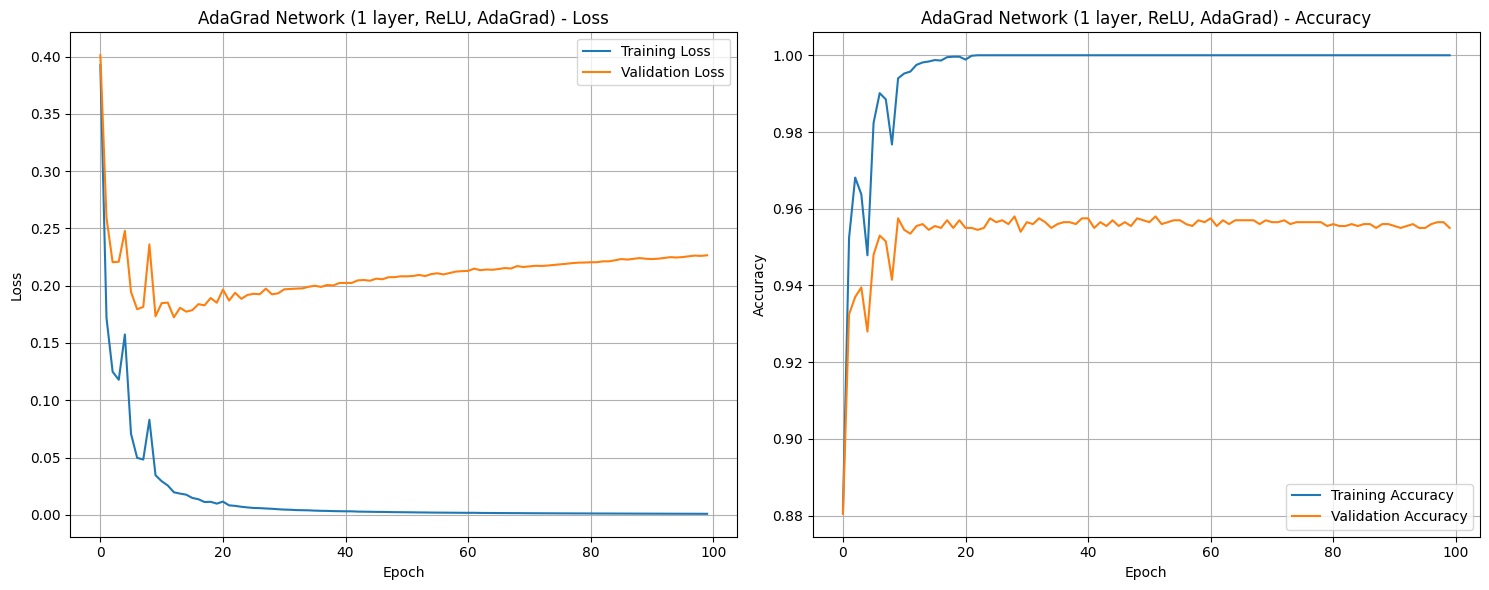


Summary of Results:
Network Configuration                    Accuracy   Time (s)  
------------------------------------------------------------
Basic Network (1 layer, Tanh, SGD)       0.8160    96.41
Deep Network (2 layers, Tanh, SGD)       0.8290    125.02
ReLU Network (1 layer, ReLU, SGD)        0.8270    41.77
Deep ReLU Network (2 layers, ReLU, SGD)  0.8320    56.05
AdaGrad Network (1 layer, ReLU, AdaGrad) 0.9480    51.03


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import time

# Problem 1: Fully Connected Layer Implementation
class FC:
    """
    Fully connected layer from n_nodes1 to n_nodes2 nodes
    Parameters
    ----------
    n_nodes1 : int
        Number of nodes in the previous layer
    n_nodes2 : int
        Number of nodes in the next layer
    initializer : instance of initialization method
    optimizer : instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # Initialization
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        
    def forward(self, X):
        """
        Forward pass
        Parameters
        ----------
        X : ndarray of shape (batch_size, n_nodes1)
            Input
        Returns
        -------
        A : ndarray of shape (batch_size, n_nodes2)
            Output
        """
        self.X = X  # Store input for backpropagation
        # A = X·W + B
        A = X @ self.W + self.B
        return A
        
    def backward(self, dA):
        """
        Backward pass
        Parameters
        ----------
        dA : ndarray of shape (batch_size, n_nodes2)
            Gradient flowing from the next layer
        Returns
        -------
        dZ : ndarray of shape (batch_size, n_nodes1)
            Gradient to pass to the previous layer
        """
        batch_size = dA.shape[0]
        
        # Gradient with respect to W
        self.dW = self.X.T @ dA / batch_size
        
        # Gradient with respect to B
        self.dB = np.sum(dA, axis=0) / batch_size
        
        # Gradient with respect to X
        dZ = dA @ self.W.T
        
        # Update weights and biases
        self = self.optimizer.update(self)
        
        return dZ

# Problem 2: Initialization Methods
class SimpleInitializer:
    """
    Simple initialization using Gaussian distribution
    Parameters
    ----------
    sigma : float
        Standard deviation of the Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
            Number of nodes in the previous layer
        n_nodes2 : int
            Number of nodes in the next layer
        
        Returns
        -------
        W : ndarray of shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
            Number of nodes in the next layer
        
        Returns
        -------
        B : ndarray of shape (n_nodes2,)
            Initialized biases
        """
        B = np.zeros(n_nodes2)
        return B

class XavierInitializer:
    """
    Xavier (Glorot) initialization
    Suitable for sigmoid and tanh activation functions
    """
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
            Number of nodes in the previous layer
        n_nodes2 : int
            Number of nodes in the next layer
        
        Returns
        -------
        W : ndarray of shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # Xavier initialization: sigma = 1/sqrt(n)
        sigma = 1.0 / np.sqrt(n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
            Number of nodes in the next layer
        
        Returns
        -------
        B : ndarray of shape (n_nodes2,)
            Initialized biases
        """
        B = np.zeros(n_nodes2)
        return B

class HeInitializer:
    """
    He initialization
    Suitable for ReLU activation functions
    """
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
            Number of nodes in the previous layer
        n_nodes2 : int
            Number of nodes in the next layer
        
        Returns
        -------
        W : ndarray of shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        # He initialization: sigma = sqrt(2/n)
        sigma = np.sqrt(2.0 / n_nodes1)
        W = sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
            Number of nodes in the next layer
        
        Returns
        -------
        B : ndarray of shape (n_nodes2,)
            Initialized biases
        """
        B = np.zeros(n_nodes2)
        return B

# Problem 3: Optimization Methods
class SGD:
    """
    Stochastic Gradient Descent
    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        Update weights and biases of a layer
        Parameters
        ----------
        layer : instance of a layer
            Layer to update
        
        Returns
        -------
        layer : instance of a layer
            Updated layer
        """
        # Update weights
        layer.W -= self.lr * layer.dW
        
        # Update biases
        layer.B -= self.lr * layer.dB
        
        return layer

class AdaGrad:
    """
    Adaptive Gradient Algorithm (AdaGrad)
    Parameters
    ----------
    lr : float
        Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
        self.h = {}  # Dictionary to store accumulated squared gradients
        
    def update(self, layer):
        """
        Update weights and biases of a layer
        Parameters
        ----------
        layer : instance of a layer
            Layer to update
        
        Returns
        -------
        layer : instance of a layer
            Updated layer
        """
        # Initialize accumulated squared gradients if not already present
        if id(layer) not in self.h:
            self.h[id(layer)] = {
                'W': np.zeros_like(layer.W),
                'B': np.zeros_like(layer.B)
            }
        
        # Update accumulated squared gradients for weights
        self.h[id(layer)]['W'] += layer.dW ** 2
        
        # Update weights
        layer.W -= self.lr * layer.dW / (np.sqrt(self.h[id(layer)]['W']) + 1e-7)
        
        # Update accumulated squared gradients for biases
        self.h[id(layer)]['B'] += layer.dB ** 2
        
        # Update biases
        layer.B -= self.lr * layer.dB / (np.sqrt(self.h[id(layer)]['B']) + 1e-7)
        
        return layer

# Problem 4: Activation Functions
class Sigmoid:
    """
    Sigmoid activation function
    """
    def forward(self, X):
        """
        Forward pass
        Parameters
        ----------
        X : ndarray
            Input
        
        Returns
        -------
        Y : ndarray
            Output after applying sigmoid
        """
        self.Y = 1 / (1 + np.exp(-X))
        return self.Y
        
    def backward(self, dY):
        """
        Backward pass
        Parameters
        ----------
        dY : ndarray
            Gradient from the next layer
        
        Returns
        -------
        dX : ndarray
            Gradient to pass to the previous layer
        """
        # Derivative of sigmoid(x) is sigmoid(x) * (1 - sigmoid(x))
        dX = dY * self.Y * (1 - self.Y)
        return dX

class Tanh:
    """
    Hyperbolic tangent activation function
    """
    def forward(self, X):
        """
        Forward pass
        Parameters
        ----------
        X : ndarray
            Input
        
        Returns
        -------
        Y : ndarray
            Output after applying tanh
        """
        self.X = X
        return np.tanh(X)
        
    def backward(self, dY):
        """
        Backward pass
        Parameters
        ----------
        dY : ndarray
            Gradient from the next layer
        
        Returns
        -------
        dX : ndarray
            Gradient to pass to the previous layer
        """
        # Derivative of tanh(x) is 1 - tanh^2(x)
        dX = dY * (1 - np.tanh(self.X)**2)
        return dX

class ReLU:
    """
    Rectified Linear Unit activation function
    """
    def forward(self, X):
        """
        Forward pass
        Parameters
        ----------
        X : ndarray
            Input
        
        Returns
        -------
        Y : ndarray
            Output after applying ReLU
        """
        self.X = X
        return np.maximum(0, X)
        
    def backward(self, dY):
        """
        Backward pass
        Parameters
        ----------
        dY : ndarray
            Gradient from the next layer
        
        Returns
        -------
        dX : ndarray
            Gradient to pass to the previous layer
        """
        # Derivative of ReLU is 1 if x > 0, 0 otherwise
        dX = dY * (self.X > 0)
        return dX

class Softmax:
    """
    Softmax activation function with cross-entropy loss
    """
    def forward(self, X):
        """
        Forward pass
        Parameters
        ----------
        X : ndarray of shape (batch_size, n_classes)
            Input
        
        Returns
        -------
        Y : ndarray of shape (batch_size, n_classes)
            Output probabilities after applying softmax
        """
        # Subtract max for numerical stability
        self.X = X
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.Y = exp_X / np.sum(exp_X, axis=1, keepdims=True)
        return self.Y
        
    def backward(self, T, Y=None):
        """
        Backward pass (combined with cross-entropy loss)
        Parameters
        ----------
        T : ndarray of shape (batch_size, n_classes)
            True labels (one-hot encoded)
        Y : ndarray of shape (batch_size, n_classes), optional
            Output probabilities from forward pass
        
        Returns
        -------
        dX : ndarray of shape (batch_size, n_classes)
            Gradient to pass to the previous layer
        """
        if Y is None:
            Y = self.Y
            
        batch_size = Y.shape[0]
        # Derivative of softmax with cross-entropy is (y - t)
        dX = (Y - T) / batch_size
        return dX

# Problem 8: Deep Neural Network Classifier
class ScratchDeepNeuralNetworkClassifier:
    """
    Deep Neural Network Classifier from scratch
    Parameters
    ----------
    hidden_layer_sizes : list
        List of integers representing the number of nodes in each hidden layer
    activation : str, default='tanh'
        Activation function to use ('tanh', 'relu', 'sigmoid')
    optimizer : str, default='sgd'
        Optimization method ('sgd', 'adagrad')
    initializer : str, default='simple'
        Weight initialization method ('simple', 'xavier', 'he')
    learning_rate : float, default=0.1
        Learning rate for optimization
    sigma : float, default=0.01
        Standard deviation for simple initialization
    max_epochs : int, default=1000
        Maximum number of epochs
    batch_size : int, default=32
        Batch size for mini-batch gradient descent
    random_state : int, default=None
        Random seed for reproducibility
    verbose : bool, default=True
        Whether to print progress during training
    """
    def __init__(self, hidden_layer_sizes, activation='tanh', optimizer='sgd',
                 initializer='simple', learning_rate=0.1, sigma=0.01,
                 max_epochs=1000, batch_size=32, random_state=None, verbose=True):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.optimizer = optimizer
        self.initializer = initializer
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self.verbose = verbose
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        
    def _get_activation(self, activation_name):
        """
        Get activation function instance
        Parameters
        ----------
        activation_name : str
            Name of the activation function
        
        Returns
        -------
        activation : instance of activation function
        """
        if activation_name == 'tanh':
            return Tanh()
        elif activation_name == 'relu':
            return ReLU()
        elif activation_name == 'sigmoid':
            return Sigmoid()
        elif activation_name == 'softmax':
            return Softmax()
        else:
            raise ValueError(f"Unsupported activation function: {activation_name}")
    
    def _get_initializer(self, initializer_name):
        """
        Get initializer instance
        Parameters
        ----------
        initializer_name : str
            Name of the initializer
        
        Returns
        -------
        initializer : instance of initializer
        """
        if initializer_name == 'simple':
            return SimpleInitializer(self.sigma)
        elif initializer_name == 'xavier':
            return XavierInitializer()
        elif initializer_name == 'he':
            return HeInitializer()
        else:
            raise ValueError(f"Unsupported initializer: {initializer_name}")
    
    def _get_optimizer(self, optimizer_name):
        """
        Get optimizer instance
        Parameters
        ----------
        optimizer_name : str
            Name of the optimizer
        
        Returns
        -------
        optimizer : instance of optimizer
        """
        if optimizer_name == 'sgd':
            return SGD(self.learning_rate)
        elif optimizer_name == 'adagrad':
            return AdaGrad(self.learning_rate)
        else:
            raise ValueError(f"Unsupported optimizer: {optimizer_name}")
    
    def _init_layers(self, n_features, n_classes):
        """
        Initialize network layers
        Parameters
        ----------
        n_features : int
            Number of input features
        n_classes : int
            Number of output classes
        """
        self.n_features = n_features
        self.n_classes = n_classes
        
        # Get initializer and optimizer instances
        initializer = self._get_initializer(self.initializer)
        optimizer = self._get_optimizer(self.optimizer)
        
        # Create layers
        self.layers = []
        
        # Input layer to first hidden layer
        layer_sizes = [n_features] + self.hidden_layer_sizes + [n_classes]
        activation_list = [self.activation] * len(self.hidden_layer_sizes) + ['softmax']
        
        for i in range(len(layer_sizes) - 1):
            # Add fully connected layer
            fc = FC(layer_sizes[i], layer_sizes[i+1], initializer, optimizer)
            self.layers.append(('fc', fc))
            
            # Add activation function except for the last layer (handled separately)
            if i < len(layer_sizes) - 2:
                activation = self._get_activation(activation_list[i])
                self.layers.append(('activation', activation))
        
        # Output layer activation (softmax)
        self.output_activation = self._get_activation('softmax')
    
    def _forward_pass(self, X):
        """
        Perform forward pass through the network
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        
        Returns
        -------
        Y : ndarray of shape (n_samples, n_classes)
            Output probabilities
        """
        A = X
        for layer_type, layer in self.layers:
            A = layer.forward(A)
        
        Y = self.output_activation.forward(A)
        return Y
    
    def _backward_pass(self, X, T):
        """
        Perform backward pass through the network
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        T : ndarray of shape (n_samples, n_classes)
            One-hot encoded target values
        """
        # Forward pass
        A = X
        for layer_type, layer in self.layers:
            A = layer.forward(A)
        
        Y = self.output_activation.forward(A)
        
        # Backward pass
        dA = self.output_activation.backward(T, Y)
        
        for layer_type, layer in reversed(self.layers):
            dA = layer.backward(dA)
    
    def _compute_loss(self, X, T):
        """
        Compute the cross-entropy loss
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        T : ndarray of shape (n_samples, n_classes)
            One-hot encoded target values
        
        Returns
        -------
        loss : float
            Cross-entropy loss
        """
        Y = self._forward_pass(X)
        
        # Calculate cross-entropy loss
        epsilon = 1e-10
        log_probs = -np.log(np.maximum(Y, epsilon))
        loss = np.sum(T * log_probs) / len(X)
        return loss
    
    def _compute_accuracy(self, X, y):
        """
        Compute classification accuracy
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        y : ndarray of shape (n_samples,)
            True class labels
        
        Returns
        -------
        accuracy : float
            Classification accuracy
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit the neural network to the training data
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Training data
        y : ndarray of shape (n_samples,)
            Target values
        X_val : ndarray of shape (n_val_samples, n_features), optional
            Validation data
        y_val : ndarray of shape (n_val_samples,), optional
            Validation target values
        
        Returns
        -------
        self : object
            Returns self
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Initialize layers
        self._init_layers(n_features, n_classes)
        
        # One-hot encode the target values
        T = np.zeros((n_samples, n_classes))
        for i in range(n_samples):
            T[i, y[i]] = 1
        
        # One-hot encode validation targets if provided
        if X_val is not None and y_val is not None:
            T_val = np.zeros((len(y_val), n_classes))
            for i in range(len(y_val)):
                T_val[i, y_val[i]] = 1
        
        # Training loop
        for epoch in range(self.max_epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            T_shuffled = T[indices]
            y_shuffled = y[indices]
            
            # Mini-batch training
            for i in range(0, n_samples, self.batch_size):
                batch_end = min(i + self.batch_size, n_samples)
                X_batch = X_shuffled[i:batch_end]
                T_batch = T_shuffled[i:batch_end]
                
                # Perform backpropagation
                self._backward_pass(X_batch, T_batch)
            
            # Calculate and record training loss and accuracy
            train_loss = self._compute_loss(X, T)
            train_accuracy = self._compute_accuracy(X, y)
            self.train_loss_history.append(train_loss)
            self.train_acc_history.append(train_accuracy)
            
            # Calculate and record validation loss and accuracy if validation data is provided
            if X_val is not None and y_val is not None:
                val_loss = self._compute_loss(X_val, T_val)
                val_accuracy = self._compute_accuracy(X_val, y_val)
                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_accuracy)
            
            # Print progress
            if self.verbose and epoch % 10 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss:.6f}, Training Accuracy: {train_accuracy:.4f}", end="")
                if X_val is not None and y_val is not None:
                    print(f", Validation Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.4f}")
                else:
                    print()
        
        return self
    
    def predict(self, X):
        """
        Predict class labels for samples in X
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        
        Returns
        -------
        y_pred : ndarray of shape (n_samples,)
            Predicted class labels
        """
        Y = self._forward_pass(X)
        return np.argmax(Y, axis=1)
    
    def predict_proba(self, X):
        """
        Predict class probabilities for samples in X
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        
        Returns
        -------
        Y : ndarray of shape (n_samples, n_classes)
            Predicted class probabilities
        """
        return self._forward_pass(X)
    
    def score(self, X, y):
        """
        Calculate accuracy
        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data
        y : ndarray of shape (n_samples,)
            True class labels
        
        Returns
        -------
        accuracy : float
            Classification accuracy
        """
        return self._compute_accuracy(X, y)
    
    def plot_learning_curve(self, title='Learning Curve'):
        """
        Plot learning curves (loss and accuracy)
        Parameters
        ----------
        title : str, default='Learning Curve'
            Title for the plot
        """
        plt.figure(figsize=(15, 6))
        
        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(self.train_loss_history, label='Training Loss')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{title} - Loss')
        plt.legend()
        plt.grid(True)
        
        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(self.train_acc_history, label='Training Accuracy')
        if self.val_acc_history:
            plt.plot(self.val_acc_history, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'{title} - Accuracy')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()


def load_mnist(n_train=60000, n_test=10000):
    """
    Load and preprocess the MNIST dataset
    Parameters
    ----------
    n_train : int, default=60000
        Number of training samples to use
    n_test : int, default=10000
        Number of test samples to use
    
    Returns
    -------
    X_train : ndarray of shape (n_train, 784)
        Training data
    X_test : ndarray of shape (n_test, 784)
        Test data
    y_train : ndarray of shape (n_train,)
        Training labels
    y_test : ndarray of shape (n_test,)
        Test labels
    """
    print("Loading MNIST dataset...")
    
    # Load data from Keras
    (X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()
    
    # Reshape and normalize
    X_train = X_train_full[:n_train].reshape(n_train, -1) / 255.0
    X_test = X_test_full[:n_test].reshape(n_test, -1) / 255.0
    y_train = y_train_full[:n_train]
    y_test = y_test_full[:n_test]
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test


def display_mnist_images(X, y, indices=None, num_images=5):
    """
    Display MNIST images
    Parameters
    ----------
    X : ndarray of shape (n_samples, 784)
        Input data
    y : ndarray of shape (n_samples,)
        Labels
    indices : list, optional
        Indices of images to display
    num_images : int, default=5
        Number of images to display if indices is None
    """
    if indices is None:
        indices = np.random.choice(len(X), num_images, replace=False)
    elif isinstance(indices, int):
        indices = [indices]
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Evaluate different network configurations
def evaluate_network(network_config, X_train, X_test, y_train, y_test, epochs=100):
    """
    Train and evaluate a neural network with the given configuration
    Parameters
    ----------
    network_config : dict
        Network configuration
    X_train : ndarray of shape (n_train_samples, n_features)
        Training data
    X_test : ndarray of shape (n_test_samples, n_features)
        Test data
    y_train : ndarray of shape (n_train_samples,)
        Training labels
    y_test : ndarray of shape (n_test_samples,)
        Test labels
    epochs : int, default=100
        Number of training epochs
    
    Returns
    -------
    nn : ScratchDeepNeuralNetworkClassifier
        Trained neural network
    test_accuracy : float
        Test accuracy
    training_time : float
        Training time in seconds
    """
    # Unpack configuration
    name = network_config['name']
    hidden_layer_sizes = network_config['hidden_layer_sizes']
    activation = network_config['activation']
    optimizer = network_config['optimizer']
    initializer = network_config['initializer']
    
    print(f"\nEvaluating {name}...")
    print(f"Configuration: {hidden_layer_sizes}, {activation}, {optimizer}, {initializer}")
    
    # Create and train the network
    start_time = time.time()
    
    nn = ScratchDeepNeuralNetworkClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        optimizer=optimizer,
        initializer=initializer,
        learning_rate=0.1,
        max_epochs=epochs,
        batch_size=128,
        random_state=42,
        verbose=True
    )
    
    # Create validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Train the network
    nn.fit(X_train, y_train, X_val, y_val)
    
    training_time = time.time() - start_time
    
    # Evaluate on test set
    test_accuracy = nn.score(X_test, y_test)
    
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    # Plot learning curves
    nn.plot_learning_curve(title=name)
    
    return nn, test_accuracy, training_time


def main():
    # Load and preprocess MNIST data
    X_train, X_test, y_train, y_test = load_mnist(n_train=10000, n_test=1000)
    
    # Display some MNIST images
    display_mnist_images(X_train, y_train)
    
    # Define different network configurations
    configurations = [
        {
            'name': 'Basic Network (1 layer, Tanh, SGD)',
            'hidden_layer_sizes': [100],
            'activation': 'tanh',
            'optimizer': 'sgd',
            'initializer': 'xavier'
        },
        {
            'name': 'Deep Network (2 layers, Tanh, SGD)',
            'hidden_layer_sizes': [100, 50],
            'activation': 'tanh',
            'optimizer': 'sgd',
            'initializer': 'xavier'
        },
        {
            'name': 'ReLU Network (1 layer, ReLU, SGD)',
            'hidden_layer_sizes': [100],
            'activation': 'relu',
            'optimizer': 'sgd',
            'initializer': 'he'
        },
        {
            'name': 'Deep ReLU Network (2 layers, ReLU, SGD)',
            'hidden_layer_sizes': [100, 100],
            'activation': 'relu',
            'optimizer': 'sgd',
            'initializer': 'he'
        },
        {
            'name': 'AdaGrad Network (1 layer, ReLU, AdaGrad)',
            'hidden_layer_sizes': [100],
            'activation': 'relu',
            'optimizer': 'adagrad',
            'initializer': 'he'
        }
    ]
    
    # Evaluate each configuration
    results = []
    for config in configurations:
        nn, accuracy, training_time = evaluate_network(config, X_train, X_test, y_train, y_test)
        results.append((config['name'], accuracy, training_time))
    
    # Print summary
    print("\nSummary of Results:")
    print("=" * 60)
    print(f"{'Network Configuration':<40} {'Accuracy':<10} {'Time (s)':<10}")
    print("-" * 60)
    for name, accuracy, time in results:
        print(f"{name:<40} {accuracy:.4f}    {time:.2f}")
    print("=" * 60)

if __name__ == "__main__":
    main()